In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
import pandas as pd

file_path = '/Users/shuvradas/Downloads/Bike Sales Dashboard.xlsx'

sheet_name = 'bike_buyers'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the dataframe
df

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No


In [4]:
df.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [5]:
df.set_index('ID', inplace=True)
df.head()

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
ID,,,,,,,,,,,,,
12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [6]:
df.nunique()

Martial Status       2
Gender               2
Income              16
Children             6
Education            5
Occupation           5
Home Owner           2
Cars                 5
Commute Distance     5
Region               3
Age                 53
Age Brackets         3
Purchased Bike       2
dtype: int64

In [7]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

Martial Status: ['Married' 'Single']
Gender: ['Female' 'Male']
Income: [ 40000  30000  80000  70000  10000 160000  20000 120000  90000 170000
  60000 100000 130000 150000  50000 110000]
Children: [1 3 5 0 2 4]
Education: ['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation: ['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home Owner: ['Yes' 'No']
Cars: [0 1 2 4 3]
Commute Distance: ['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' 'More than 10 Miles']
Region: ['Europe' 'Pacific' 'North America']
Age: [42 43 60 41 36 50 33 58 40 54 55 35 45 38 59 47 56 34 63 29 44 32 26 31
 62 30 28 65 48 66 46 52 39 61 37 68 51 25 49 53 27 67 57 70 78 69 64 89
 80 73 74 71 72]
Age Brackets: ['Middle Age' 'Old' 'Adolescent']
Purchased Bike: ['No' 'Yes']


In [8]:
#mapping ordinal values to numerical values

In [9]:
df['Occupation'] = df['Occupation'].map({'Clerical': 0, 'Manual': 1,'Skilled Manual': 2,'Management': 3,'Professional': 4})
df['Education'] = df['Education'].map({'Partial High School': 0, 'High School': 1, 'Partial College': 2, 'Bachelors': 3, 'Graduate Degree': 4})
df['Commute Distance'] = df['Commute Distance'].map({'0-1 Miles': 0, '1-2 Miles': 1, '2-5 Miles': 2, '5-10 Miles': 3, 'More than 10 Miles': 4})
df['Age Brackets'] = df['Age Brackets'].map({'Middle Age':1 , 'Old': 2, 'Adolescent': 0})


In [10]:
#label encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Martial Status'] = labelencoder.fit_transform(df['Martial Status'])
df['Gender']= labelencoder.fit_transform(df['Gender'])
df['Home Owner'] = labelencoder.fit_transform(df['Home Owner'])
df['Region'] = labelencoder.fit_transform(df['Region'])
df['Purchased Bike'] = labelencoder.fit_transform(df['Purchased Bike']) 

In [13]:
df.drop('Age', axis=1, inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('Purchased Bike', axis=1)
y = df['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age Brackets
ID,,,,,,,,,,,
16466,1,0,20000,0,0,1,0,2,0,0,1
23893,0,1,50000,3,3,2,1,3,4,1,1
18390,0,1,80000,5,2,4,1,2,0,1,1
24725,0,0,40000,3,2,0,1,0,1,1,1
18891,0,0,40000,0,2,2,1,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20430,0,1,70000,2,2,2,1,2,3,2,1
12231,1,0,10000,2,2,1,1,0,0,0,1
15839,1,1,30000,0,2,2,1,1,3,1,1


In [16]:
#scaling data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#PCA

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [20]:
#ANN

In [21]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(5,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/Applications/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
import tensorflow as tf

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [23]:
#compilation of model

In [24]:
model.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1,validation_data=(X_test, y_test))

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5317 - loss: 0.7040 - val_accuracy: 0.5550 - val_loss: 0.7060
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.4972 - loss: 0.7212 - val_accuracy: 0.5550 - val_loss: 0.7031
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.5432 - loss: 0.6973 - val_accuracy: 0.5700 - val_loss: 0.7006
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.5581 - loss: 0.6903 - val_accuracy: 0.5600 - val_loss: 0.6984
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.6036 - loss: 0.6759 - val_accuracy: 0.5600 - val_loss: 0.6961
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5596 - loss: 0.6855 - val_accuracy: 0.5850 - val_loss: 0.6942
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.6131 - loss: 0.6744 - val_accuracy: 0.5800 - val_loss: 0.6923
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.5582 - loss: 0.6876 - val_accura

In [26]:
#evaluation of model

In [27]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 56.500000


In [28]:
#plot ACC curve

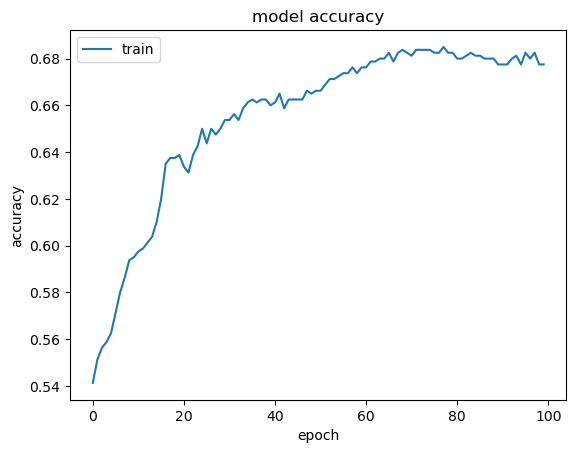

In [29]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [30]:
#plotting loss curve

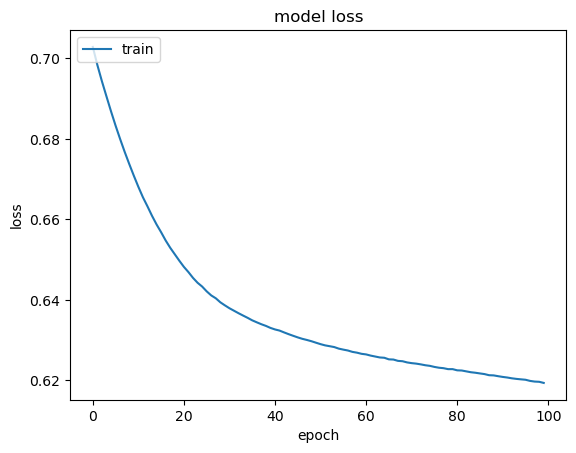

In [31]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()